In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [47]:
TRAIN_DIR="Face_mask/train/train"

In [48]:
TEST_DIR="Face_mask/test/test"

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [50]:
train_datagen=ImageDataGenerator(rescale=1./255,height_shift_range=0.2,width_shift_range=0.2,shear_range=0.2,fill_mode='nearest')

In [51]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [52]:
train_set=train_datagen.flow_from_directory(TRAIN_DIR,class_mode='binary',batch_size=32,target_size=(150,150))

Found 1314 images belonging to 2 classes.


In [53]:
test_set=train_datagen.flow_from_directory(TEST_DIR,class_mode='binary',batch_size=32,target_size=(150,150))

Found 194 images belonging to 2 classes.


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [55]:
model=Sequential()


In [56]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [58]:
model.fit_generator(train_set,epochs=10,validation_data=test_set)

Epoch 1/10
42/42 [==============================] - 61s 1s/step - loss: 0.6507 - acc: 0.6438 - val_loss: 0.3866 - val_acc: 0.8247
Epoch 2/10
42/42 [==============================] - 48s 1s/step - loss: 0.3353 - acc: 0.8577 - val_loss: 0.2215 - val_acc: 0.9381
Epoch 3/10
42/42 [==============================] - 58s 1s/step - loss: 0.2771 - acc: 0.8866 - val_loss: 0.1594 - val_acc: 0.9433
Epoch 4/10
42/42 [==============================] - 59s 1s/step - loss: 0.2103 - acc: 0.9216 - val_loss: 0.1356 - val_acc: 0.9433
Epoch 5/10
42/42 [==============================] - 57s 1s/step - loss: 0.1752 - acc: 0.9353 - val_loss: 0.1241 - val_acc: 0.9536
Epoch 6/10
42/42 [==============================] - 58s 1s/step - loss: 0.1871 - acc: 0.9285 - val_loss: 0.1335 - val_acc: 0.9536
Epoch 7/10
42/42 [==============================] - 59s 1s/step - loss: 0.1755 - acc: 0.9376 - val_loss: 0.0985 - val_acc: 0.9794
Epoch 8/10
42/42 [==============================] - 58s 1s/step - loss: 0.1494 - acc: 0.94

In [60]:
model.save('mask_detector.h5')

In [63]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img(r'C:\Users\LENOVO\Face_mask\test\test\with_mask\62-with-mask.jpg',
                          target_size=(150,150,3))

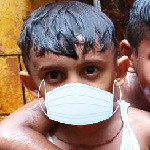

In [64]:
test_image

In [65]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)

In [73]:
if (model.predict_classes(test_image)[0][0])==0:
    print("mask_detected")
else:
    print("no_mask_detected-you have violated rules")

mask_detected
